# week scatter plot
shows the data for a garage for every week

## imports

In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../lib")))

from data_load import load_week_data, load_data

## constants

In [2]:
date_start = pd.to_datetime("2025-02-17 12:00:00 AM", format="%Y-%m-%d %I:%M:%S %p")
date_end = pd.to_datetime("2025-04-18 12:00:00 AM", format="%Y-%m-%d %I:%M:%S %p")

## helper functions

In [18]:
# plotting, for each entry in 'garage name'_data make a subplot for it in a larger plot
# assume param data is a list of dataframes, each one requiring its own plot
def weeks_plot(data):
    fig, axes = plt.subplots(len(data), 1, figsize=(10, 5 * len(data)))

    if len(data) == 1:
        axes = [axes]  # Ensure axes is iterable for a single subplot

    for i, df in enumerate(data):
        axes[i].plot(df['timestamp'], df['fullness'])
        axes[i].set_title(f"Week {i + 1}")
        axes[i].set_xlabel("Timestamp")
        axes[i].set_ylabel("Fullness")

    plt.tight_layout()
    plt.show()

# plots all the data with normalized x axis
# all time stamps are normalized to the start of their week
def same_plot(start_dates, data):
    ## TODO modify x axis in data set so it is all standardized
    for i, df in enumerate(data):
        x_data = (df['timestamp'] - start_dates[i]).dt.total_seconds() / 60
        plt.scatter(x_data, df['fullness'], alpha=0.5, label=f'week {start_dates[i]}')

    plt.tight_layout()
    plt.legend()
    plt.show()

## load data

In [4]:
start_dates, _, week_data = load_week_data(date_start, date_end)

Start Dates: [Timestamp('2025-02-17 00:00:00'), Timestamp('2025-02-24 00:00:00'), Timestamp('2025-03-03 00:00:00'), Timestamp('2025-03-10 00:00:00'), Timestamp('2025-03-17 00:00:00'), Timestamp('2025-03-24 00:00:00'), Timestamp('2025-03-31 00:00:00'), Timestamp('2025-04-07 00:00:00'), Timestamp('2025-04-14 00:00:00')]
End Dates: [Timestamp('2025-02-22 00:00:00'), Timestamp('2025-03-01 00:00:00'), Timestamp('2025-03-08 00:00:00'), Timestamp('2025-03-15 00:00:00'), Timestamp('2025-03-22 00:00:00'), Timestamp('2025-03-29 00:00:00'), Timestamp('2025-04-05 00:00:00'), Timestamp('2025-04-12 00:00:00'), Timestamp('2025-04-19 00:00:00')]


# plotting all weeks

## north garage

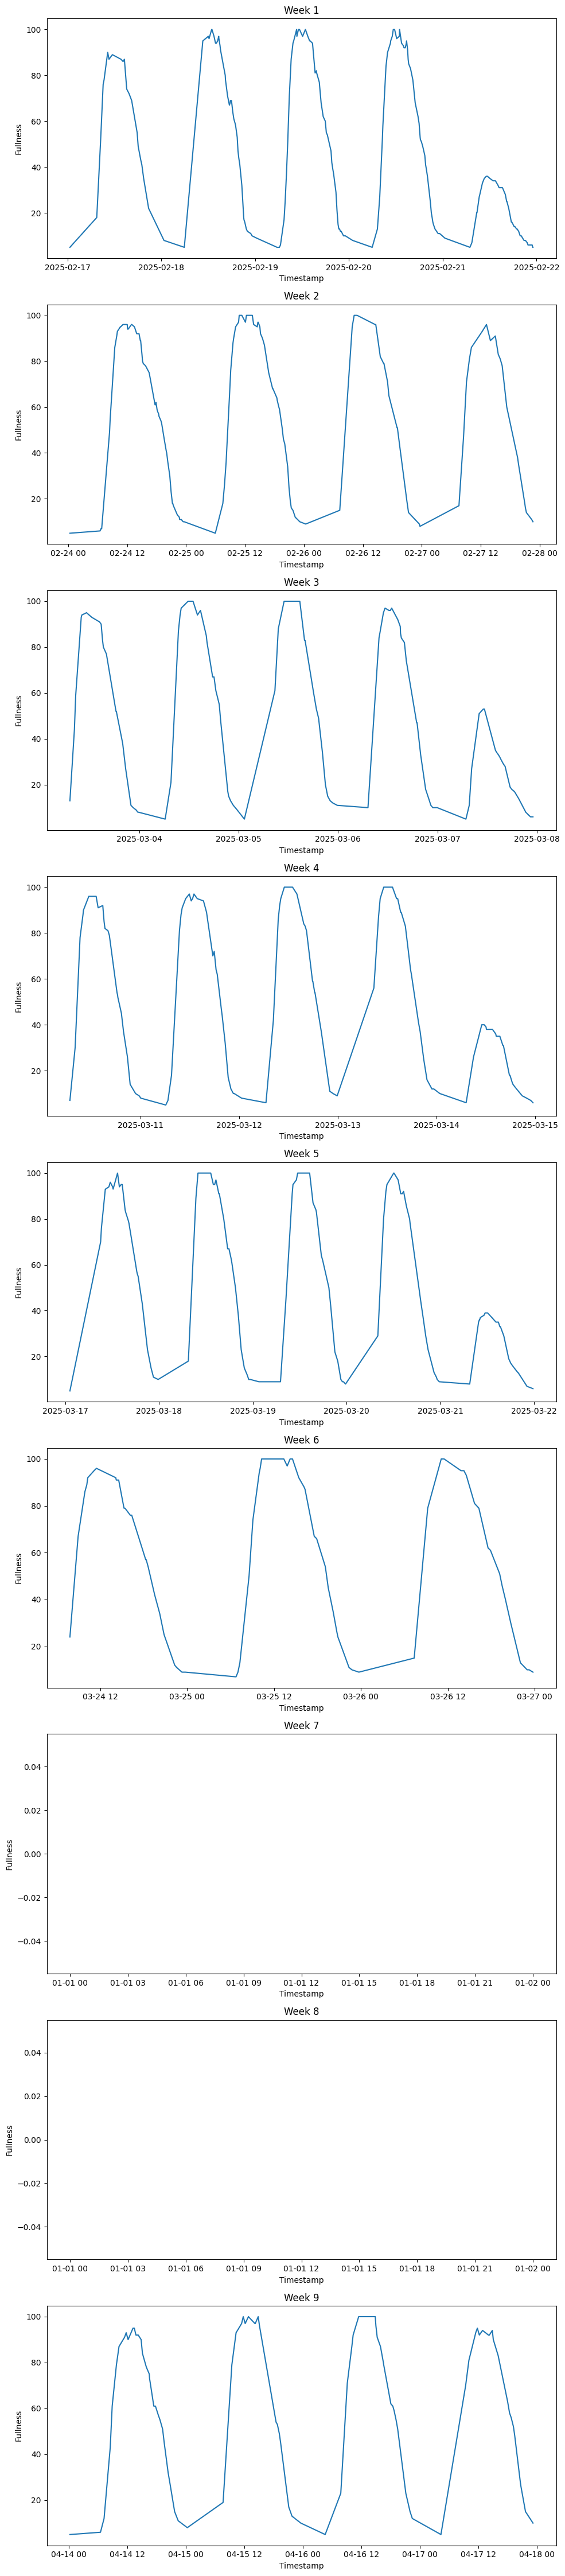

In [5]:
north_data = week_data['North Garage']

weeks_plot(north_data)

## south garage

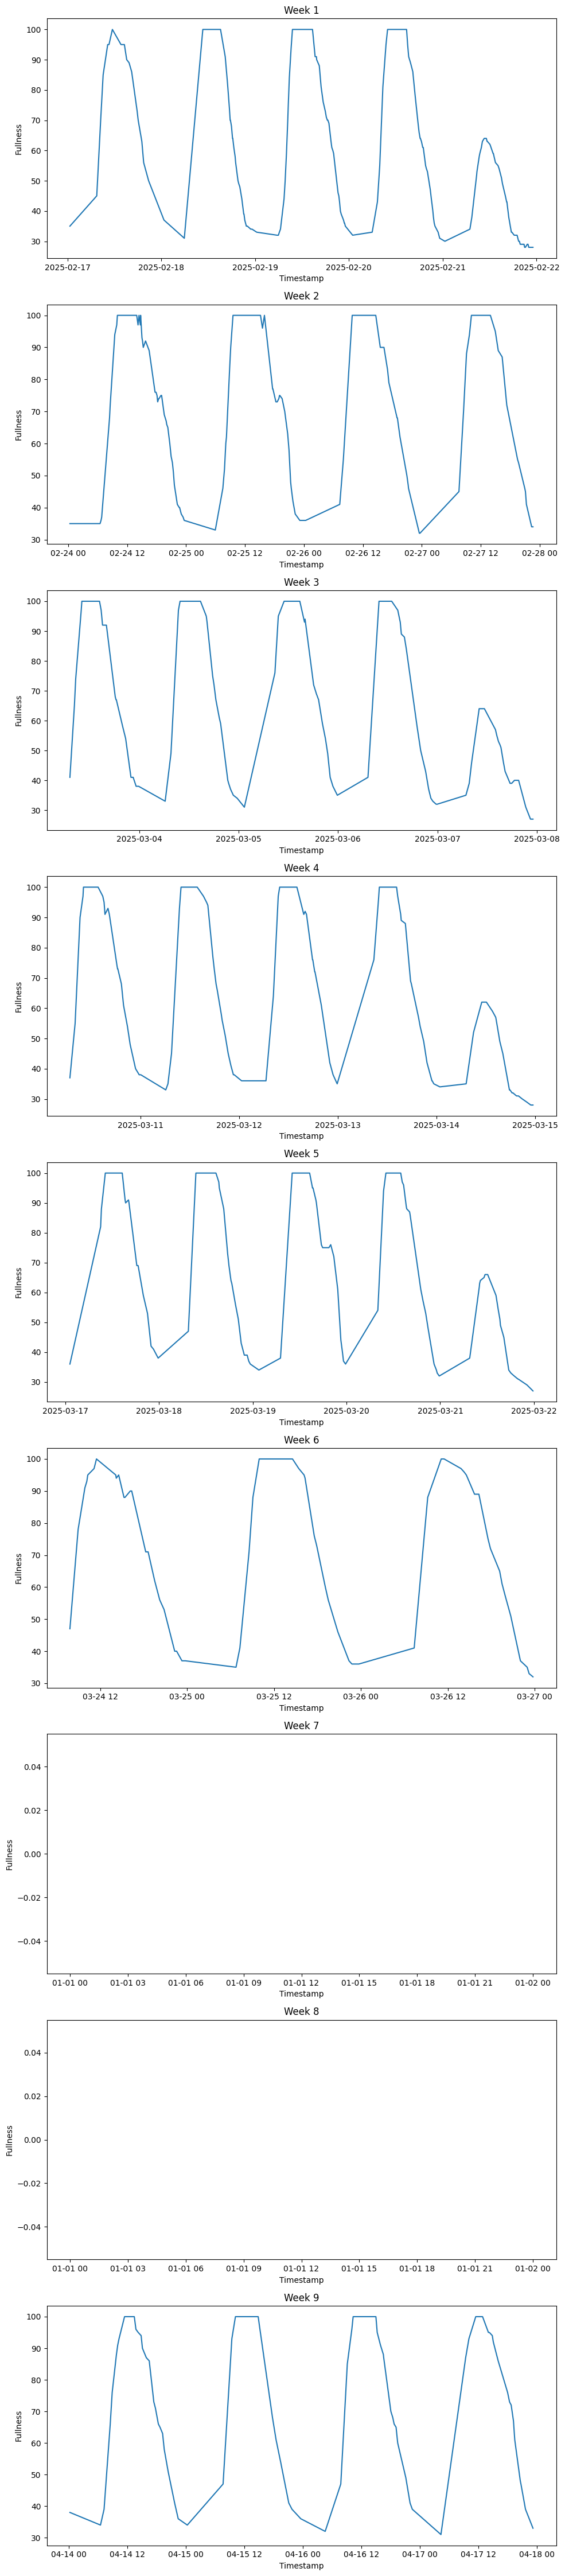

In [6]:
south_data = week_data['South Garage']

weeks_plot(south_data)

## west garage

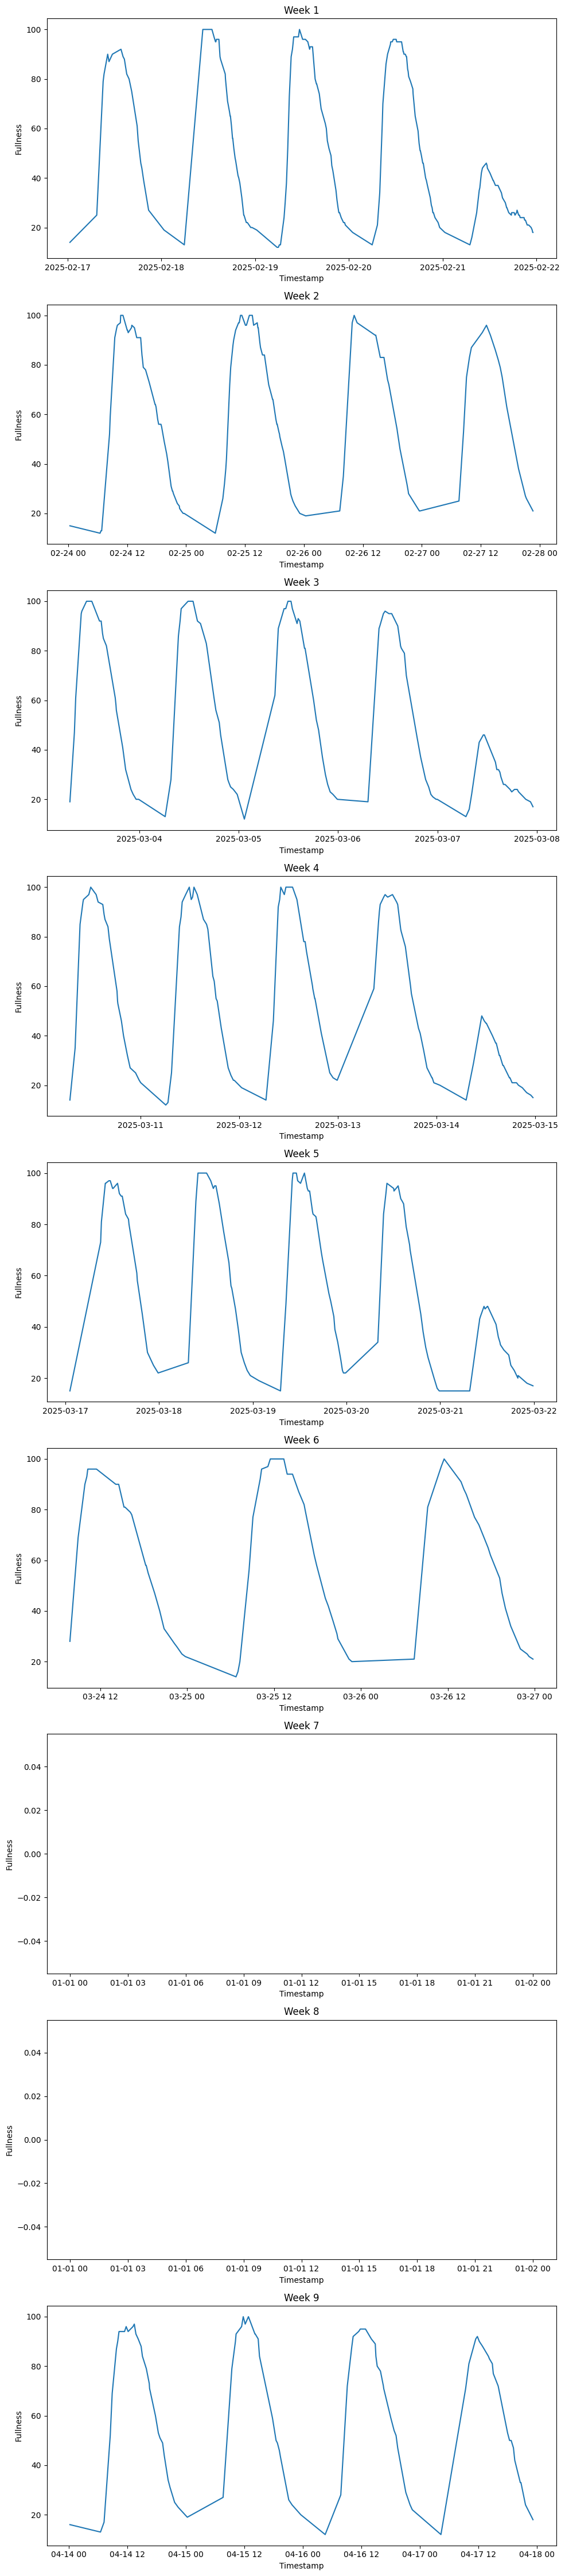

In [7]:
west_data = week_data['West Garage']

weeks_plot(west_data)

## south campus garage

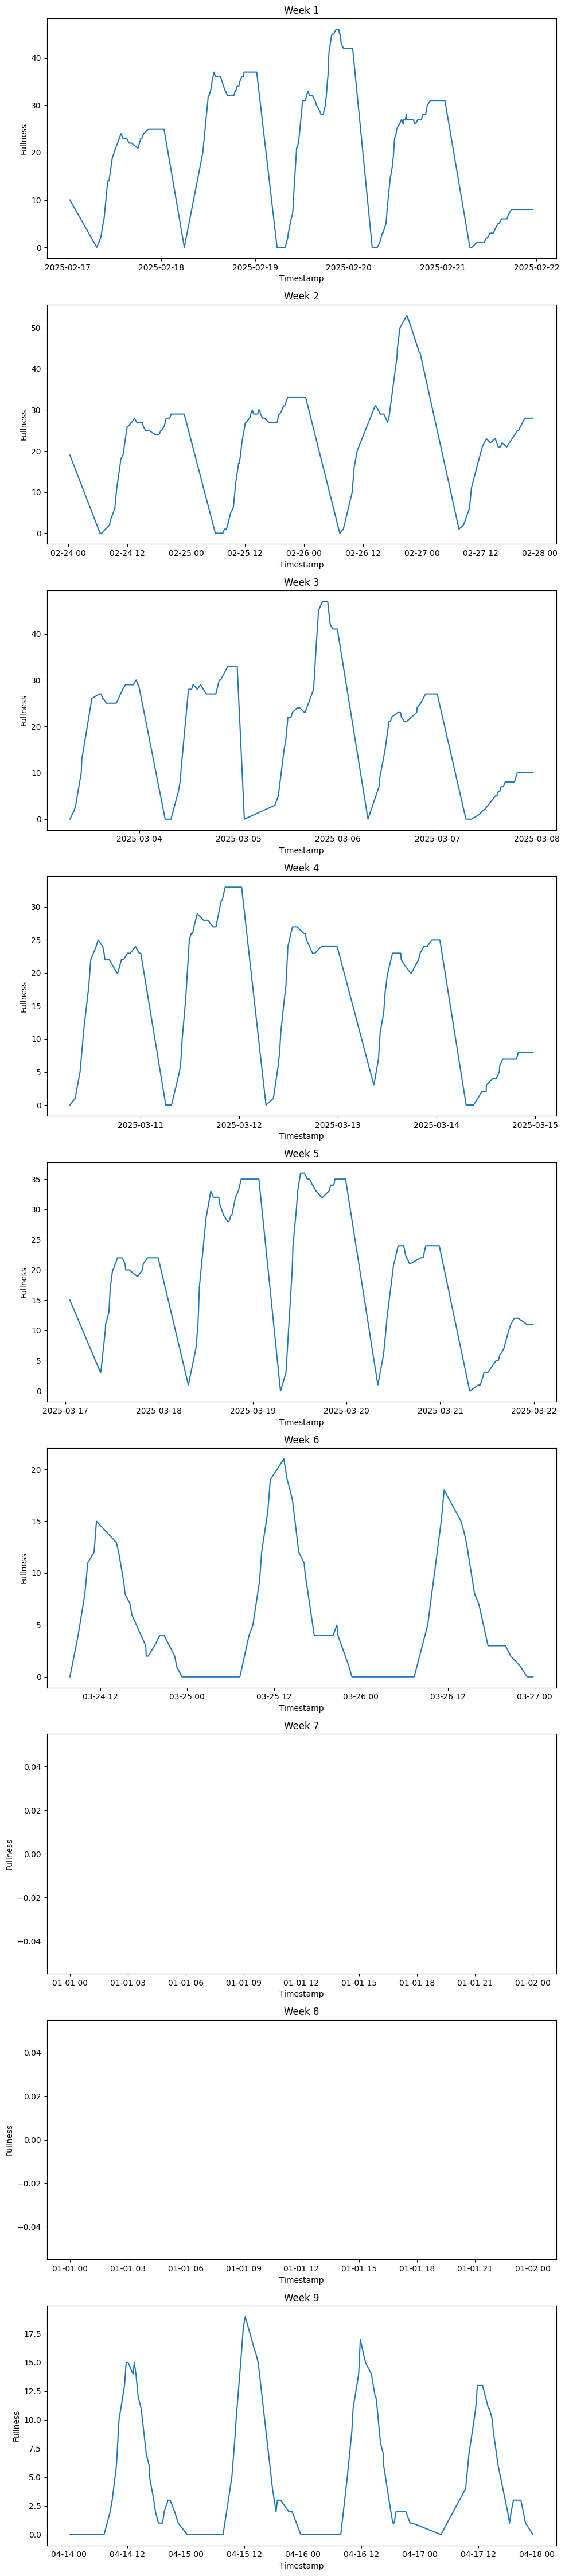

In [8]:
south_campus_data = week_data['South Campus Garage']

weeks_plot(south_campus_data)

# all weeks on same plot

## plt all weeks on same plane

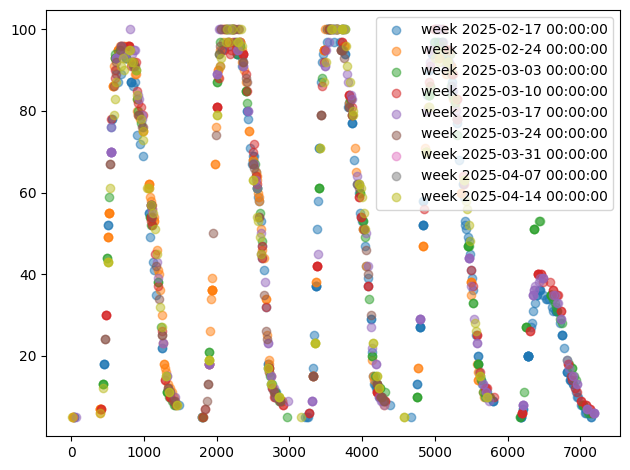

In [19]:
same_plot(start_dates, north_data)

## first and last week on same plane

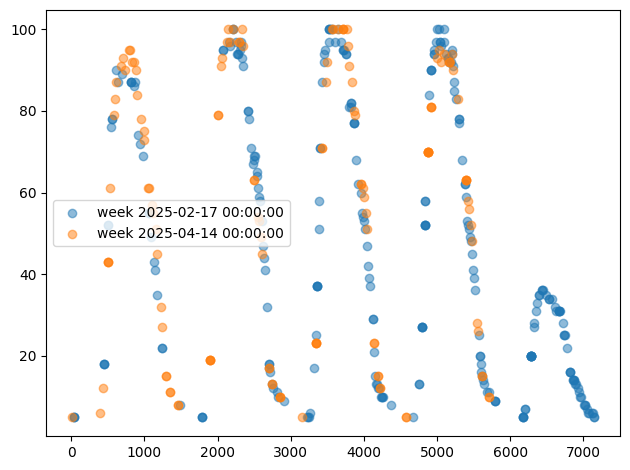

In [20]:
same_plot([start_dates[0], start_dates[-1]], [north_data[0], north_data[-1]])

## plt two consecutive weeks together 

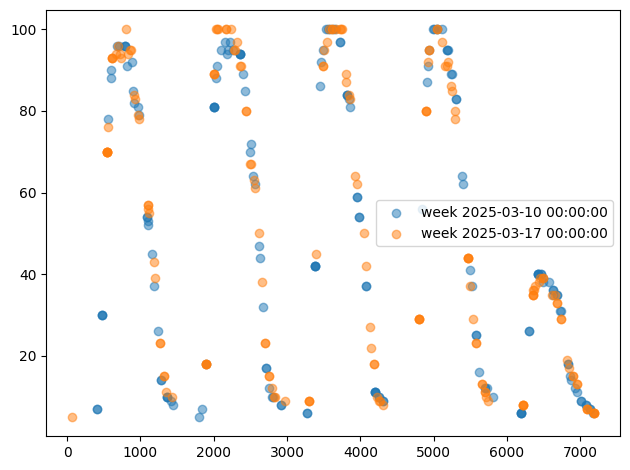

In [21]:
same_plot ([start_dates[-6], start_dates[-5]], [north_data[-6], north_data[-5]])